<a href="https://colab.research.google.com/github/wikiban43/Media-Analysis/blob/master/news_data_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import requests
import os
import json
import time
import pandas as pd
from datetime import datetime,timedelta
import time
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip3 install gensim==4.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.5 MB/s 


In [ ]:
#Yes. You can install the library in Google Drive. Then add the path to sys.path.
import os,sys
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)
#!pip3 install --target=$nb_path gensim==4.2.0\


In [ ]:
import gensim

In [ ]:
gensim.__version__

NameError: ignored

In [ ]:
!pip3 install --target=$nb_path gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
     |████████████████████████████████| 15.7 MB 56.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
def preprocess(text):
  text = text.lower()
  text = text.replace(".","")
  text = text.replace(",","")
  text = text.replace(":","")
  text = text.replace(";","")
  text = text.replace("\'","")
  text = text.replace("\"","")
  text = text.replace("?","")
  text = text.replace("/","")
  text = text.replace(">","")
  text = text.replace("<","")
  text = text.replace("+","")
  text = text.replace("=","")
  text = text.replace(")","")
  text = text.replace("(","")
  text = text.replace("]","")
  text = text.replace("[","")
  text = text.replace("}","")
  text = text.replace("{","")
  text = text.replace("*","")
  text = text.replace("&","")
  text = text.replace("^","")
  text = text.replace("%","")
  text = text.replace("$","")
  text = text.replace("#","")
  text = text.replace("@","")
  text = text.replace("!","")
  return text

In [ ]:
#documents = df["text"].to_list()
#documents2 = df["title"].to_list()

def get_clean_text(article):
  '''
  Method to remove all puncts and stopwords from an article and return the clean article.
  '''
  from nltk.corpus import stopwords
  en_stops = set(stopwords.words('english'))
  #print(article)
  try:
    article = preprocess(article)
  except:
    return article
  art_words = article.split(" ")
    #print(art_words)
  clean_art_words=[]
  for word in art_words:
    #word = ''.join(filter(str.isalnum, word))
    if word not in en_stops:
      clean_art_words.append(word)
  article = " ".join(clean_art_words)
  return article

# Topic inference using pre-trained/custom trained Fasttext model

In [ ]:
#!pip3 install --target=$nb_path newspaper3k
#pip3 install --target=$nb_path nltk.corpus

In [ ]:
!pip3 install gensim
!pip3 install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 8.3 MB/s 
     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 7.4 MB 60.3 MB/s 
     |████████████████████████████████| 81 kB 10.4 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=eb437b4b8bd74d756d0d456763895e8e270d0c05df7add72d4ad9a745ce19fe7
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=7548c14a3d9e35ff273817a03514a117ce9c13c534da0c554a526926ae7a61dc
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=j

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts  # some example sentences

In [ ]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
path = "drive/My Drive/MSR/News Aggregator/"

#df = pd.read_excel(path+"Source_List.xlsx")
df = pd.read_excel(path+"Subsections source links.xlsx")

In [ ]:
#df_free = df.loc[df["Free"]=="Yes"]
df_free = df

In [ ]:
!pip3 install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 32.0 MB/s 
     |████████████████████████████████| 93 kB 939 kB/s 
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |████████████████████████████████| 7.4 MB 58.5 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=63de8d0a132c6fdc7f9f0580b1ff5f1cc79ecf4be9c9411ac1fdc1b0e9237e25
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=52f7344f177139d7fb1c9f501a2809c80e2b9a60332bdb4e458e747239f89ccc
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=710f2cbc0ad142764963f5ec998601020d2c23f3439e23a9

In [ ]:
from newspaper import build
from newspaper import Article

articles = []
urls_set = set()

c=0
for url in df_free["URL"].to_list():
  #print(cnn_articles.articles)
  cnn_articles = build(url, memoize_articles=False)
  c+=1
  for article in cnn_articles.articles:
    # check to see if the article url is not within the urls_set
    #print(article.url)
    if article.url not in urls_set:
      # add the unique article url to the set
      urls_set.add(article.url)
      #articles.append((article.title,article.publish_date))
  print("Processed:"+str(c)+" links.")

title_l = []
link_l=[]
author_l = []
date_l = []
text_l = []
md_l = []
df = pd.DataFrame()
for url in urls_set:
  article = Article(url)
  #print(url)
  article.download()
  try:
    article.parse()
    link_l.append(article.url)
    title_l.append(article.title)
    author_l.append(article.authors)
    date_l.append(article.publish_date)
    text_l.append(article.text)
    md_l.append(list(article.meta_data))
    #for key in article.meta_data.keys():
    #  print(key)
    #  print(article.meta_data[key])
    #break
  except:
    continue
df["url"] = link_l
df["title"] = title_l
df["author"] = author_l
df["date"] = date_l
df["text"] = text_l
#df["metadata"] = md_l



In [ ]:
df.to_csv(path+"all_news_data_v3.csv")

In [ ]:
df.shape

(4535, 5)

In [ ]:
df = pd.read_csv(path+"all_news_data_v2.csv")

In [ ]:
#from gensim.models.keyedvectors import KeyedVectors
#model_path = path+'document-similarity-master/data/GoogleNews-vectors-negative300.bin'
#w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

import gensim
# upgrade gensim if you can't import softcossim
from gensim.matutils import softcossim 
from gensim import *
from gensim import corpora
import gensim.downloader as api
from gensim.utils import simple_preprocess
print(gensim.__version__)

# Download the FastText model
#fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

3.6.0


In [ ]:
#pickle.dump(fasttext_model300, open(path+"fasttext_model300.pickle","wb"))

NameError: ignored

In [ ]:
fasttext_model300 = pickle.load(open(path+"fasttext_model300.pickle","rb"))

#Model trained on our corpus


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df.shape

(4595, 5)

In [ ]:
len(clean_docs)

NameError: ignored

In [ ]:
#pickle.dump(clean_docs,open(path+"clean_docs.pickle","wb"))
#pickle.dump(clean_docs,open(path+"clean_docs_v2.pickle","wb"))

In [ ]:
documents = df["text"].to_list()
documents2 = df["title"].to_list()

clean_docs = []

#Get clean docs (without stopwords) for text and titles for the new data
for i in range(len(documents)):
  article1 = get_clean_text(documents[i])
  article2 = get_clean_text(documents2[i])
  try:
    clean_docs.append(article1+" "+article2)
  except:
    continue
#for article in documents:
#  article = get_clean_text(article)
#  clean_docs.append(article)


#clean_docs = pickle.load(open(path+"clean_docs_v2.pickle","rb"))
#clean_docs = clean_docs

In [ ]:
len(clean_docs)

4340

In [ ]:
# Prepare a dictionary and a corpus.
#dictionary = corpora.Dictionary([simple_preprocess(doc) for doc in clean_docs])
clean_docs = clean_docs[0:500]
l=[]
for doc in clean_docs:
  try:
    l.append(simple_preprocess(doc))
  except:
    continue
dictionary = corpora.Dictionary(l)

print("Dictionary created.")
#print("Similarity matrix created.")
sentences=[0]*len(clean_docs)
# Convert the sentences into bag-of-words vectors.
for i in range(len(clean_docs)):
  #print(clean_docs[i])
  try:
    sentences[i] = dictionary.doc2bow(simple_preprocess(clean_docs[i]))
  except:
    continue
  if i%100 == 0:
    print("Sentence-"+str(i))

Dictionary created.
Sentence-0
Sentence-100
Sentence-200
Sentence-300
Sentence-400


In [ ]:
# Prepare the similarity matrix
similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)
#index = gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(fasttext_model300.wv.syn0))

#for sims in index:
#    similarity_matrix.append(sims)
#similarity_array = np.array(similarity_matrix)

In [ ]:
similarity_matrix

<22081x22081 sparse matrix of type '<class 'numpy.float32'>'
	with 503653 stored elements in Compressed Sparse Column format>

In [ ]:
pickle.dump(similarity_matrix,open(path+"similarity_500_v3.pickle","wb"))
#similarity_matrix = pickle.load(open(path+"similarity_500_v2.pickle","rb"))

In [ ]:
#Read all previously clustered articles by Shruthi
df_ground = pd.read_excel("drive/My Drive/MSR/60 stories and links for metadata collection .xlsx")
#df_ground = pd.read_excel("drive/My Drive/MSR/News Aggregator/Subsections source links.xlsx")

In [ ]:
df_ground.dropna(how="all",inplace=True)

In [ ]:
df_ground.reset_index(inplace=True)

In [ ]:
df_ground.drop("index",axis=1,inplace=True)

In [ ]:
df_ground.shape

(12, 7)

In [ ]:

from newspaper import Config
from newspaper import build
from newspaper import Article
#user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.53'
config = Config()
ground_urls = []

#For the ground truth data, get the topic to text dict
from collections import defaultdict
text_l = []
df_ground2 = pd.DataFrame()
topic2text = defaultdict(list)
for i in range(1,df_ground.shape[0]):
  for j in range(df_ground.shape[1]):  
    url = df_ground.iloc[i,j]
    #print(url)
    #print(df_ground.columns[j])
    #print("\n")
    try:
      if type(url)==str:
        article = Article(url)
        #print(url)
        article.download()
      
        article.parse()
        topic = df_ground.columns[j]
        topic2text[topic].append(get_clean_text(article.text))
    except:
      continue
  #except:
  #  continue
print("COMPLETED")

COMPLETED


In [ ]:
topic2text

In [ ]:
import numpy as np
#print(topic2text.keys())
#s = topic2text["Gender,  Diversity & Inclusivity "][0]
#fout = open("drive/My Drive/MSR/News Aggregator/title_to_topic.csv","w")

sentences = sentences[0:100]
l1 = []
l2 = []
l3 = []
for i in range(len(sentences)):
  for topic in topic2text.keys():
    median_l=[]
    for text in topic2text[topic]: 
      text = text.replace("\n","")
      textbow = dictionary.doc2bow(simple_preprocess(text))
      #print(textbow)
      #print(sentences[i])
      #sim = softcossim(sentences[i], textbow, similarity_matrix)
      sim = softcossim(sentences[i], textbow, similarity_matrix)
      median_l.append(sim)
    l1.append(documents2[i])
    l2.append(topic)
    l3.append(np.median(median_l))
    #fout.write(documents2[i]+'\t'+topic+'\t'+str(np.median(median_l))+'\n')
    #print("Median sim for: "+documents2[i]+" for "+str(topic)+" is "+str(np.median(median_l)))
    #print(documents[i])
df_temp=pd.DataFrame()
df_temp["title"] = l1
df_temp["topic"] = l2
df_temp["median sim"] = l3



In [ ]:
len(sentences)

100

In [ ]:
#Topic mapping with augmentation
import numpy as np
from copy import deepcopy
#print(topic2text.keys())
#s = topic2text["Gender,  Diversity & Inclusivity "][0]
#fout = open("drive/My Drive/MSR/News Aggregator/title_to_topic.csv","w")

num_iter = 3
sentences = sentences[0:100]
#Copy initial topic2text dict
t2t = deepcopy(topic2text)
l1 = []
l2 = []
l3 = []
#For each iteration for augmentation
for iter in range(0,num_iter):
  #For each sentence
  for i in range(len(sentences)):
    #For each topic in t2t dict
    for topic in t2t.keys():
      #Initialize median list for similarities of one topic's text with the sentence
      median_l=[]
      #print("Now will be comparing with:"+str(len(t2t[topic]))+" articles for "+topic)
      #For each text present in t2t dict for that topic
      for text in t2t[topic]: 
        #Preprocess text
        try:
          text = text.replace("\n","")
          textbow = dictionary.doc2bow(simple_preprocess(text))
          #Compare similarity of text with the sentence
          sim = softcossim(sentences[i], textbow, similarity_matrix)
          #Append sim(text,sentence)
          median_l.append(sim)
        except:
          continue
      
      #print(np.median(median_l))
      #If median value of sims for that topic with sentence is above threshold
      if np.median(median_l)>=0.4:
        #Append that sentence to the topic in t2t dict
        #print("Appending")#+documents[i]+" to "+str(topic))
        t2t[topic].append(documents[i])
        #break
        #If this is the last iteration, append the sentence to topic mapping to the df lists
        if iter == num_iter-1:
          l1.append(documents2[i])
          l2.append(topic)
          l3.append(np.mean(median_l))
      else:
        #If this is the last iteration, append the sentence to topic mapping to the df lists
        if iter == num_iter-1 and documents2[i] not in l1:
          l1.append(documents2[i])
          l2.append("Others")
          l3.append("--")
      #fout.write(documents2[i]+'\t'+topic+'\t'+str(np.median(median_l))+'\n')
      #print("Median sim for: "+documents2[i]+" for "+str(topic)+" is "+str(np.median(median_l)))
      #print(documents[i])
  print("ONE SCAN OF DICTIONARY COMPLETED.")
  #break
df_temp=pd.DataFrame()
df_temp["title"] = l1
df_temp["topic"] = l2
df_temp["median sim"] = l3
print("COMPLETE")


ONE SCAN OF DICTIONARY COMPLETED.
ONE SCAN OF DICTIONARY COMPLETED.
ONE SCAN OF DICTIONARY COMPLETED.
COMPLETE


In [ ]:
i=3
print(len(t2t[list(t2t.keys())[i]]))
print(len(topic2text[list(topic2text.keys())[i]]))

31
11


In [ ]:
def make_minus1(string):
  if string=='--':
    string = -1
  return string

df_temp["median sim"] = df_temp["median sim"].apply(lambda x: make_minus1(x))

In [ ]:
df_temp.head(20)

,title,topic,median sim
0,Hapur Sc (Uttar Pradesh) Assembly Election Res...,Others,-1.000000
1,More free trade will not solve the food crisis,Others,-1.000000
2,How to enable Alexa person and package announc...,Others,-1.000000
3,Fujifilm is working on a fix for an issue that...,Others,-1.000000
4,How scientists scrambled to stop Donald Trump’...,Others,-1.000000
5,How scientists scrambled to stop Donald Trump’...,Environment & Sustainability,0.436837
6,How scientists scrambled to stop Donald Trump’...,Science & Technology,0.434709
7,How scientists scrambled to stop Donald Trump’...,Arts & Culture,0.425612
8,How scientists scrambled to stop Donald Trump’...,Wellness & workplace,0.420452
9,Kidwai Nagar (Uttar Pradesh) Assembly Election...,Others,-1.000000


In [ ]:
#df_temp = pd.read_csv("drive/My Drive/MSR/News Aggregator/title_to_topic.csv")
#df_temp.head(200)
#df_temp.to_csv("drive/My Drive/MSR/News Aggregator/title_to_topic_500_v3.csv")

In [ ]:
df_temp = pd.read_csv("drive/My Drive/MSR/News Aggregator/title_to_topic_500.csv")

In [ ]:
df_tempg = df_temp.groupby(["title"])["median sim"].max().reset_index()

In [ ]:
df_temp2 = pd.merge(df_temp,df_tempg,how="inner", on=["title","median sim"])

In [ ]:
#df_temp2.to_csv(path+"sample_article_topic_mapping.csv")

In [ ]:
#df_temp2.loc[df_temp2["topic"]!="Others"].shape
df_temp2.head(30)

# KMeans Experiment

In [ ]:
!pip3 install sister

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 5.4 MB/s 
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for sister: filename=sister-0.1.10-py3-none-any.whl size=5395 sha256=f9c37ef7506f7976e0843bf3d514b47c442bc4b232f6a98be3fa8951dd847b4d
  Stored in directory: /root/.cache/pip/wheels/8f/2d/fe/f78c1b809e161ae840ebaf3f4a7b95350a300f89d439718042
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3143933 sha256=602a2a375164cb9535e77180b43ce2be0eb56d45343b48c1197aabd93952a9a7
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built sister fasttext


In [ ]:
import sister
import numpy as np
x = []
embedder = sister.MeanEmbedding(lang="en")
for i in range(len(documents)):
  sentence = documents[i]
  #print(sentence)
  vector = embedder(sentence)  # 300-dim vector
  x.append(list(vector))
x = np.array(x)

Loading model...
Loading model...


Loading model...
Loading model...


Loading model...


Loading model...


Loading model...
Loading model...


Loading model...


Loading model...


Loading model...
Loading model...


Loading model...


Loading model...


Loading model...


Loading model...
Loading model...


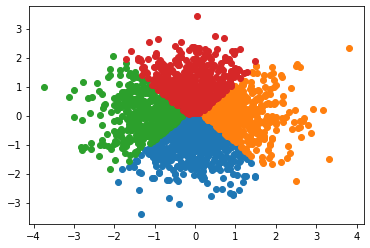

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

DIM = 2
N = 2000
num_cluster = 4
iterations = 3

x = np.random.randn(N, DIM)
y = np.random.randint(0, num_cluster, N)

mean = np.zeros((num_cluster, DIM))
for t in range(iterations):
    for k in range(num_cluster):
        mean[k] = np.mean(x[y==k], axis=0)
    for i in range(N):
        dist = np.sum((mean - x[i])**2, axis=1)
        pred = np.argmin(dist)
        y[i] = pred

for k in range(num_cluster):
    plt.scatter(x[y==k,0], x[y==k,1])
plt.show()

In [ ]:
x

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       ...,
       [ 0.39494819, -0.50388989],
       [ 1.77955908, -0.03057244],
       [ 1.57708821, -0.8128021 ]])

In [ ]:
sentences[1]

[(260, 1), (411, 1), (412, 1), (413, 1), (414, 1), (415, 1)]

In [ ]:
article.parse()
print(article.title)
print(article.authors)

print(article.publish_date)


print(article.text)

print(article.top_image)
for key in article.meta_data.keys():
  print(key+":"+str(article.meta_data[key]))

#article.movies


# Getting topic related metadata using top2vec

In [ ]:
!pip3 install top2vec

In [ ]:
from top2vec import Top2Vec

model = Top2Vec(documents, embedding_model='universal-sentence-encoder')

2022-05-19 13:23:36,993 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-19 13:23:37,154 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-05-19 13:23:56,390 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-05-19 13:23:57,325 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

In [ ]:
model.get_num_topics()

2

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)

In [ ]:
topic_words

array([['india', 'congress', 'who', 'against', 'minister', 'government',
        'court', 'has', 'said', 'an', 'other', 'which', 'such', 'and',
        'coal', 'after', 'had', 'also', 'while', 'with', 'by', 'to',
        'one', 'of', 'these', 'state', 'all', 'they', 'may', 'the', 'as',
        'have', 'where', 'for', 'from', 'some', 'them', 'year', 'was',
        'in', 'people', 'when', 'party', 'up', 'not', 'more', 'he', 'no',
        'at', 'be'],
       ['new', 'can', 'we', 'some', 'to', 'there', 'said', 'who', 'for',
        'our', 'it', 'like', 'have', 'their', 'the', 'by', 'they',
        'more', 'coal', 'be', 'one', 'its', 'people', 'and', 'an', 'on',
        'with', 'that', 'this', 'out', 'after', 'as', 'them', 'in',
        'against', 'are', 'his', 'he', 'no', 'is', 'also', 'than',
        'will', 'but', 'other', 'may', 'which', 'has', 'party', 'up']],
      dtype='<U10')

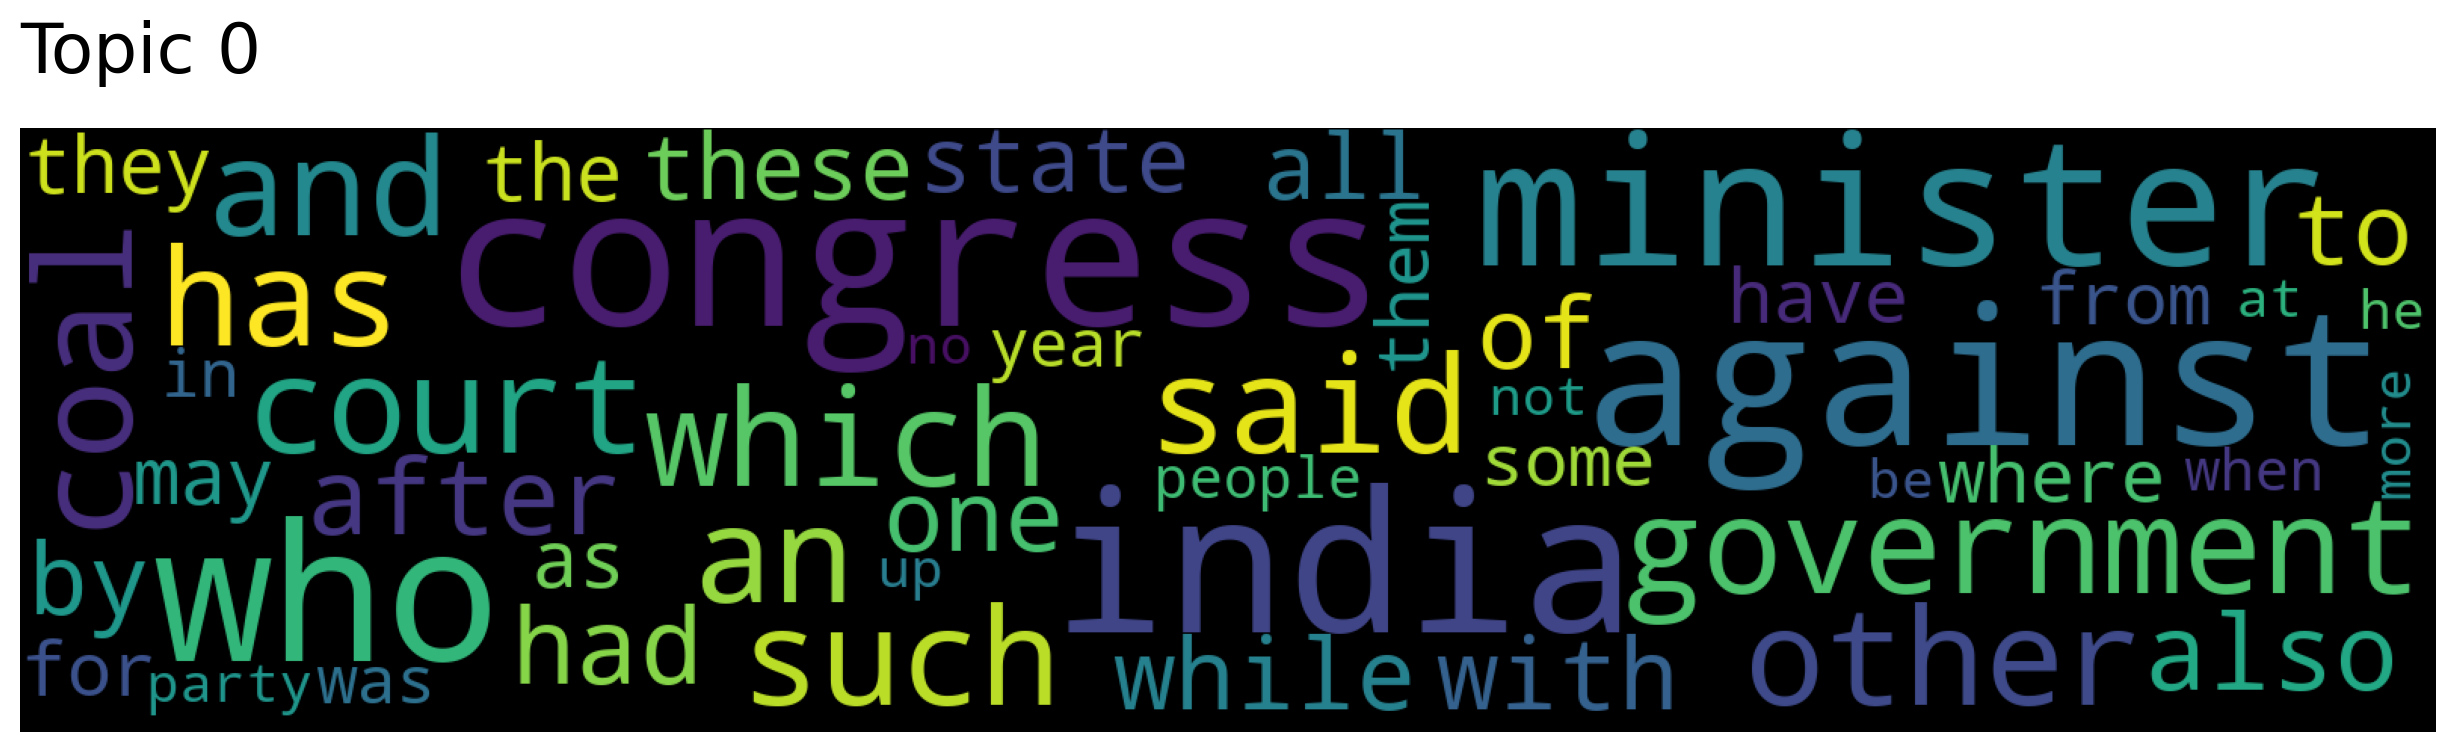

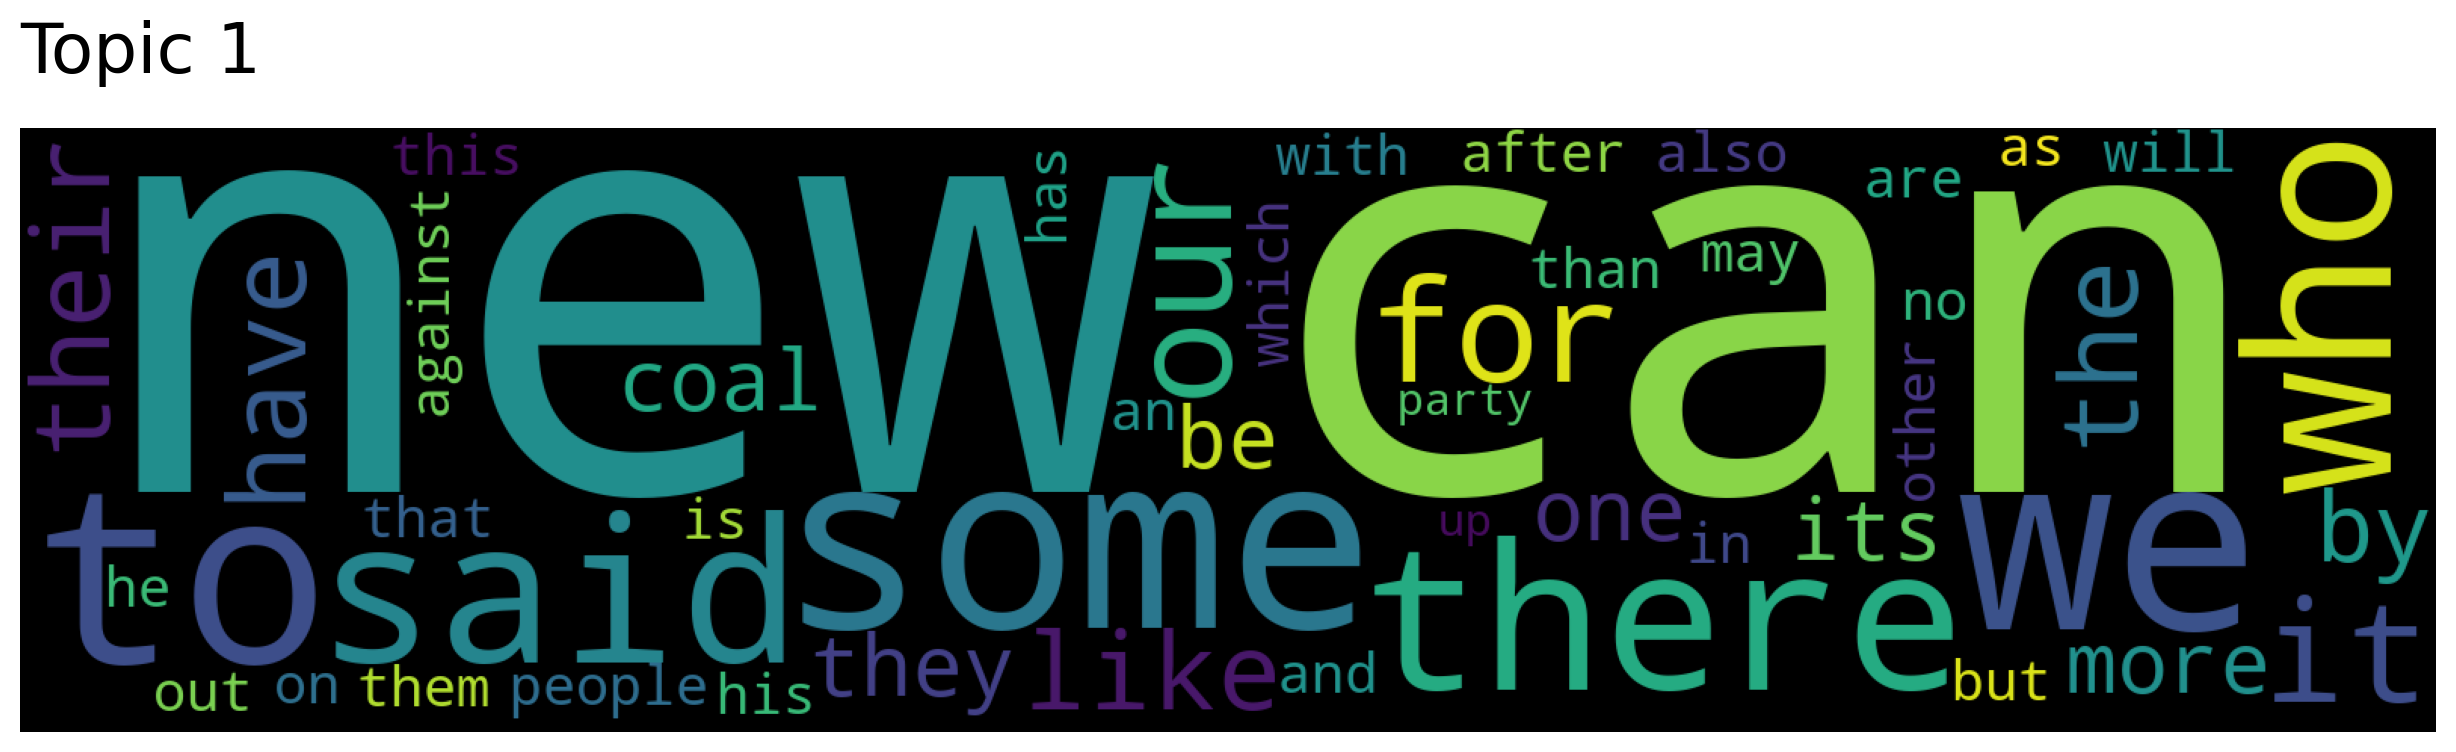

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["congress"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
!pip3 install nltk

In [ ]:
import nltk
nltk.download('punkt')
#print(article.nlp())

article.keywords


article.summary


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'She was dressed in a cartoon-spangled onesie, while he wore a tiny denim jacket and wide-legged pants.\nIt was a bluebird day in Williamsburg, Brooklyn, and I was eavesdropping on the couple at a crosswalk.\nI used to think the same thing.\nThough I still describe myself as an alcoholic, the word has fallen out of favor with marquee nondrinkers, and for good reasons.\nIn traditional 12-step treatments for alcohol addiction, as opposed to the beguiling new ones that I’m now curious about, inveterate boozers are also represented as having an eccentric orientation to lying, cheating, stealing, boasting, and mean-spiritedness.'